# Plotting with matplotlib

As discussed in the slides, matplotlib is great for producing highly customizable **static** visuals. 

While lacking the interactive dashboarding functionality of plotly or Tableau, it is excellent for tasks like: 
- Quick overviews of the data 
- Visualization prototypes 
- Static visuals for inclusion in internal technical reports (which "don't have to be pretty")

...due to its fast iteration speed (once you've learned the basics). 

It also has easy functionality for saving generated plots, which makes it ideal for inclusion as parts of scripts, allowing you to run a script that automatically generates and downloads a plot based on the script data and parameters.

In [1]:
#Imports 
import pandas as pd
import matplotlib.pyplot as plt 

## **Two plotting styles, one package.**

Matplotlib provides the infrastructure for two very distinct plotting styles. We will focus on what it calls **object-oriented plotting.**

In the **object-oriented** style, you first create a matplotlib Figure object, which contains one or more Axes objects. 

You then call various methods on these objects, such as .plot, .set_xlabel(), .set_ylabel(), etc. 


Matplotlib has cheat sheets and documentation just like Pandas does!
Here is a link to all of it: [Cheatsheets](https://github.com/matplotlib/cheatsheets#cheatsheets)
and an example of one of them:
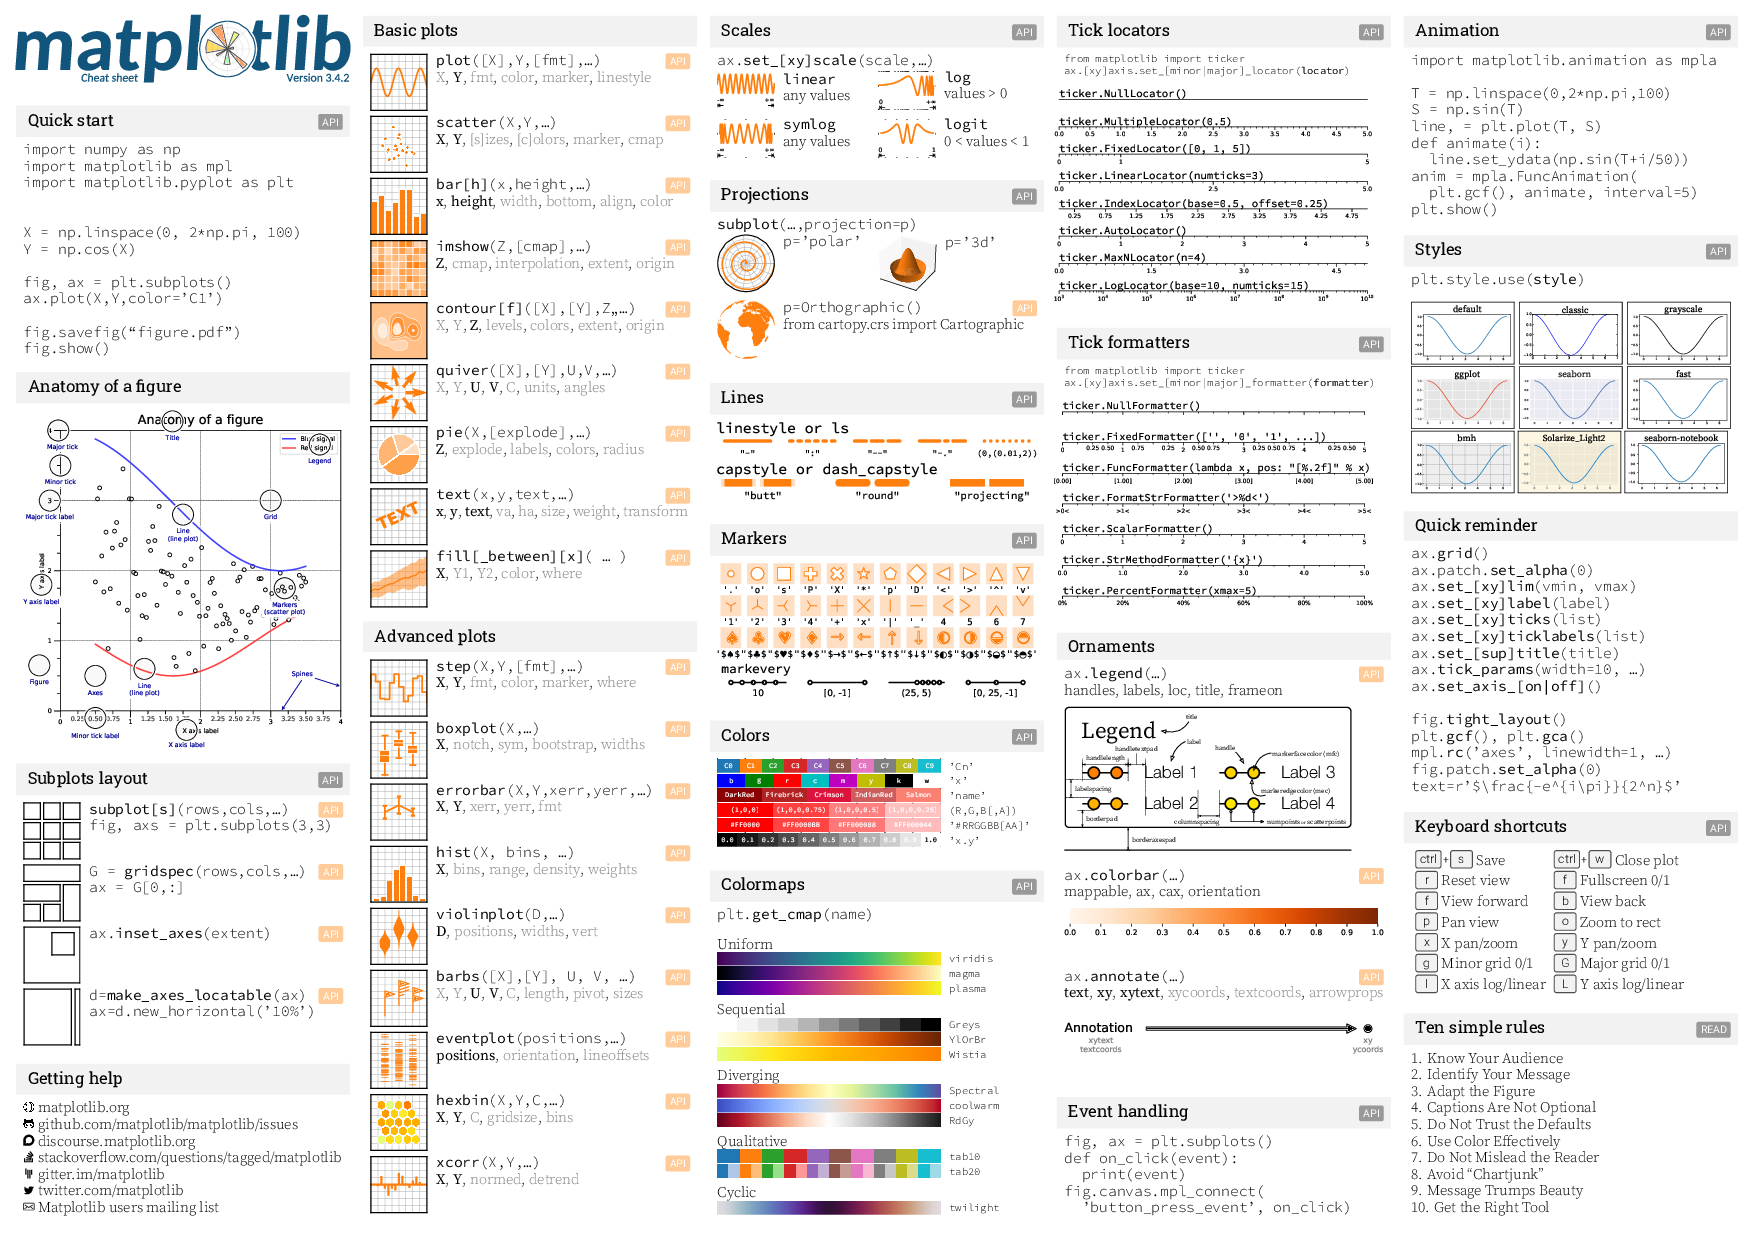

## **Object-oriented style**

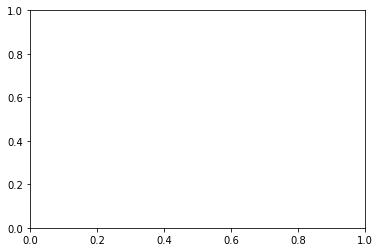

In [2]:
#Creating a Figure object with one Axes with OO style:
fig, ax = plt.subplots()

In [3]:
#These are special matplotlib object types: 
print(type(fig))
print(type(ax))

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


The `Figure` is the giant container for all our matplotlib stuff — our charts, titles, legends, other stuff.

An `Axes` (yes, one is still an Axes, not an Axis) is our actual plotting space.


**A Figure can contain multiple Axes objects (subplots), but each Axes can only belong to one figure!**

As mentioned, you can now call methods on these fig and ax objects, which we've created *and saved as variables*, to add data, labels, titles, legends.

In accordance with object-oriented style, these will take the form `ax.do_something`.

These methods are performed on the `AxesSubplot` object only and not the `Figure` object.


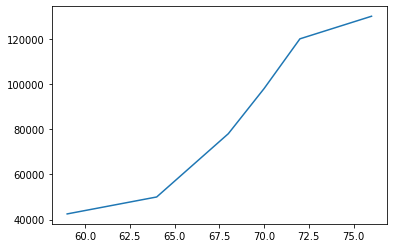

In [4]:
#Add some data. 
income = [42500, 50000, 78000, 98000, 120000, 130000]
height = [59, 64, 68, 70, 72, 76]

#plot on the Axes object.
ax.plot(height, income, label="barbers")

#Show the whole plot by referencing fig
fig

This plots a line graph by default. Notice that the axes automatically adjust to the range of the data - **remember our discussion of truncated y axes!**

We can add more data to the same Axes! Notice that we're passing in a `label` argument - this'll be helpful in allowing us to created a legend later.

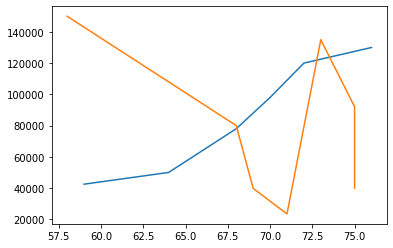

In [5]:
#Add another plot (line)

butcher_height = [58, 68, 69, 71, 73, 75, 75]
butcher_salary = [150000, 80000, 39800, 23456, 135000, 92000, 40000]

#Another ax.plot call 
ax.plot(butcher_height, butcher_salary, label="butchers")

fig

Other methods allow us to add additional info and clarify our graph:

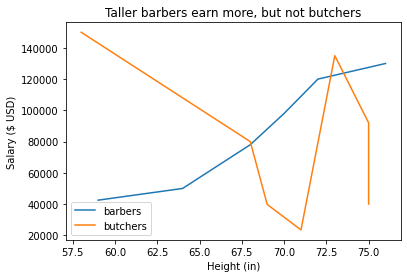

In [7]:
#axis labels
ax.set_xlabel("Height (in)")
ax.set_ylabel("Salary ($ USD)")

#Titles
ax.set_title("Taller barbers earn more, but not butchers")

#Enable a legend
ax.legend() 

fig

**Is this an appropriate plot type for the underlying data? **

Absolutely not - this connected, line-plot style provided to us on default from ax.plot implies continuity, when **we really only have real data at the "elbows" of this figure. 

This is most evident if we plot the data **outside of strict height order...**

In [8]:
bakers_height = [70, 63, 75, 57, 72]
bakers_salary = [100000, 90000, 75000, 132000, 45000]

#Add bakers
ax.plot(bakers_height, bakers_salary, label="bakers")

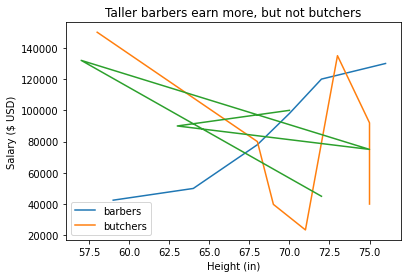

In [9]:
fig

In addition to our obvious other problems, the legend didn't update!

Calling ax.legend() again will update it. This is actually a good behavior to have, as it means that adding that data with .plot didn't change any of the other items in the figure. 

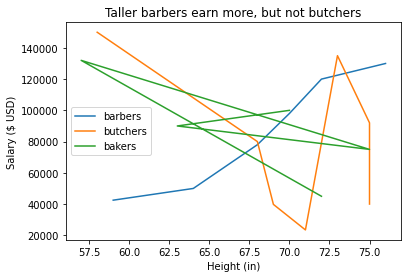

In [10]:
ax.legend()
fig

### Scatterplots
Let's plot this data a bit more appropriately using a different method, `ax.scatter(x, y, label)`, but the same overall principles.

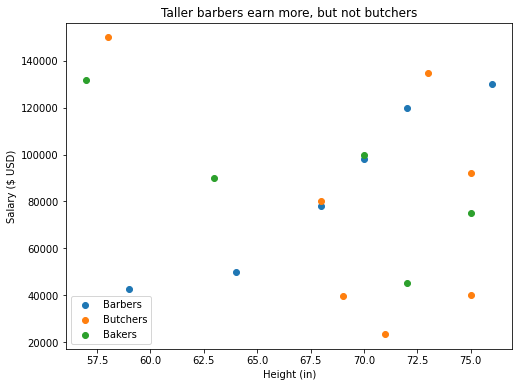

In [11]:
#Create a Figure with 1 subplot (Axes)
fig, ax = plt.subplots()

#Setting figure size to be a bit bigger:
fig.set_figheight(6)
fig.set_figwidth(8)

ax.scatter(height, income, label="Barbers")
ax.scatter(butcher_height, butcher_salary, label="Butchers")
ax.scatter(bakers_height, bakers_salary, label="Bakers")


ax.set_xlabel("Height (in)")
ax.set_ylabel("Salary ($ USD)")
ax.set_title("Taller barbers earn more, but not butchers")

ax.legend() 

Size of points is customizable through the `s` keyword. It can be based on data, but here we'll use it (and the `c` argument for color) to highlight the barbers and give their trend precedence in our visual hierarchy. 

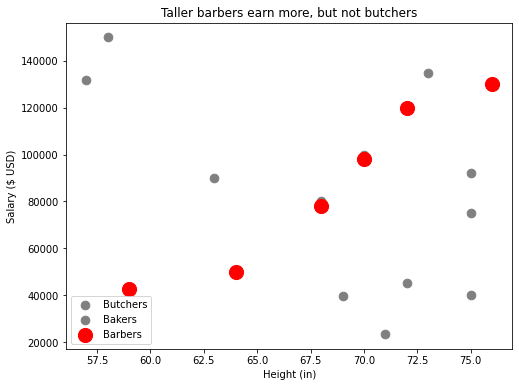

In [12]:
#Create a Figure with 1 subplot (Axes)
fig, ax = plt.subplots()

#Setting figure size to be a bit bigger:
fig.set_figheight(6)
fig.set_figwidth(8)


ax.scatter(butcher_height, butcher_salary, label="Butchers", s= 75, c= "grey")
ax.scatter(bakers_height, bakers_salary, label="Bakers", s=75, c = "grey")
ax.scatter(height, income, label="Barbers", s = 200, c= "red")

ax.set_xlabel("Height (in)")
ax.set_ylabel("Salary ($ USD)")
ax.set_title("Taller barbers earn more, but not butchers")

ax.legend()

This is (obviously) far from an ideal representation of this data - we're just trying to give you an idea of what knobs you can turn!

For instance, if you were concerned that this y axis exaggerates the trend, you could set it to 0-18000 with `ax.set_ylim`. 

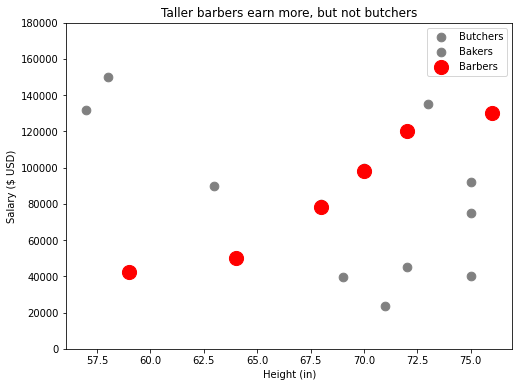

In [13]:
ax.set_ylim(0, 180000)
fig

Label font-sizes can be configured with `fontsize` inside `set_xlabel`, `set_ylabel`, or `set_title`.

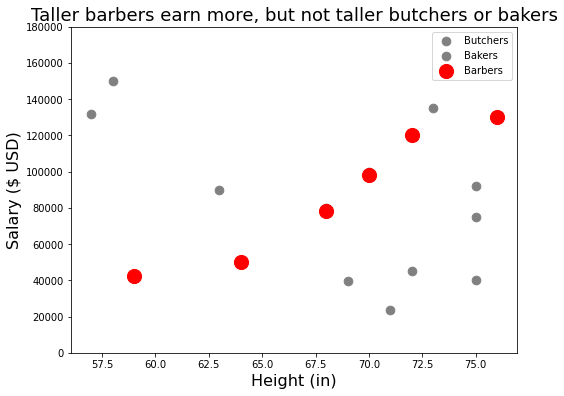

In [ ]:
ax.set_xlabel("Height (in)", fontsize=16)
ax.set_ylabel("Salary ($ USD)", fontsize=16)
ax.set_title("Taller barbers earn more, but not taller butchers or bakers", fontsize=18)
fig

And **newline characters** (`\n`) can be used to control overflow and wrap text, which isn't facilitated automatically. 

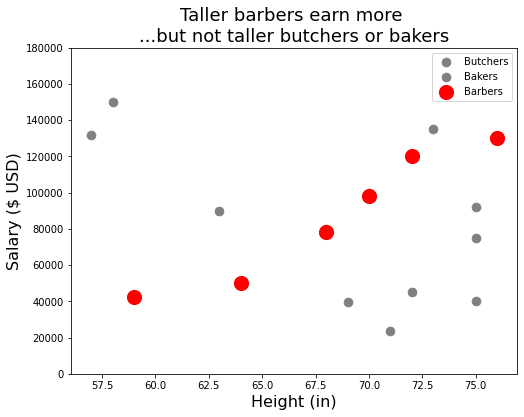

In [ ]:
ax.set_title("Taller barbers earn more \n...but not taller butchers or bakers", fontsize=18)
fig

### Annotating with text

As we discussed in the slides, static visuals can be dramatically enhaned through the addition of annotations for interesting data points. 

Matplotlib allows us to plot text directly on an Axes object, **using the existing X and Y scales in the plot, as shown below. 

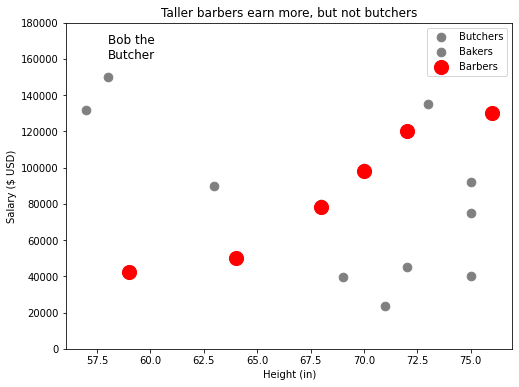

In [14]:
#Highlighting very short, very high-earning Bob the Butcher
ax.text(58, 160000, "Bob the\nButcher", fontsize = 12)
fig

But, to make this even more clear, mpl includes an `annotate` method that will help us link directly to our chosen observation with an arrow.

`ax.annotate(text, xy, xytext)`

xy is the point to annotate, 
xytext is the point to place the text.

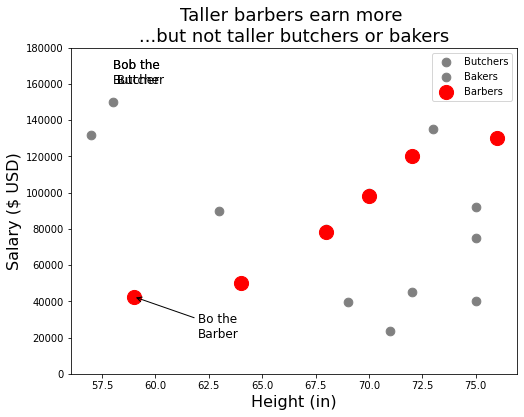

In [ ]:
ax.annotate("Bo the \nBarber", [59, 42500], [62, 20000], fontsize=12, arrowprops = {'arrowstyle':'->'})
fig

## Multiple subplots

When we ran this line of code earlier...

`fig, ax = plt.subplots()`

we were implicitly running...

`fig, ax = plt.subplots(1,1)`

...saying that we wanted 1 subplot (and thus one `Axes`) to be created. 

To make, say, a 2x3 grid of subplots, we can do this: 

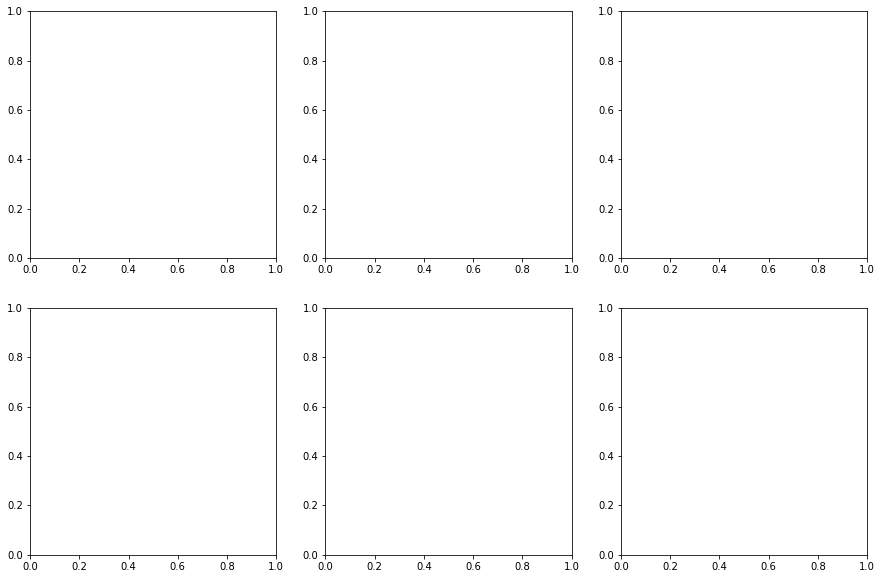

In [22]:
fig, axs = plt.subplots(2, 3, figsize=[15,10])

We can access each one of these six resulting `Axes` objects...

In [ ]:
type(axs)

numpy.ndarray

...through array indexing, since `axs` is just an array of axes objects.

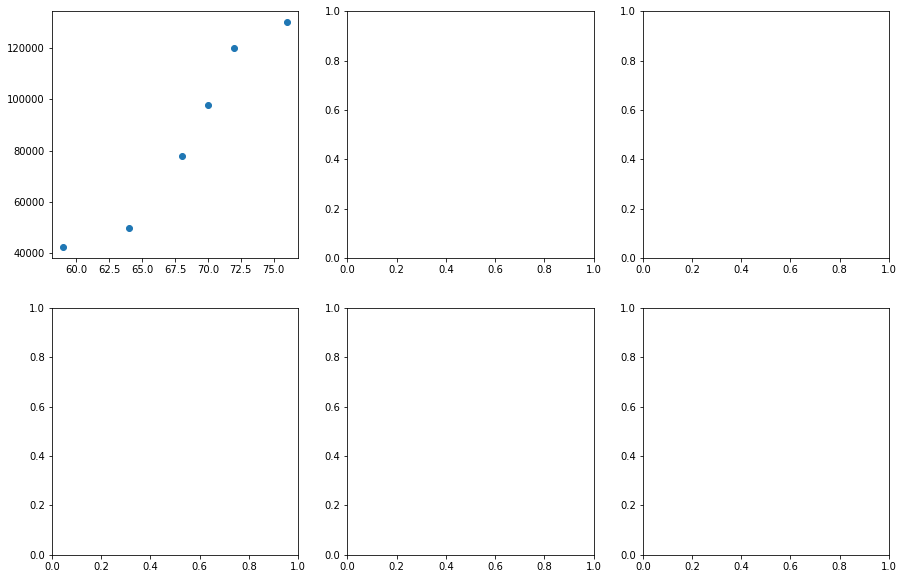

In [23]:
axs[0][0].scatter(height, income, label="barbers") #First row, first item.
fig

In [24]:
#Exericse! Add the butcher information in the 1st row, 2nd column graph and the baker information in the 1st row, 3rd column graph
axs[0][1].scatter(butcher_height, butcher_salary, label="butchers", c = "orange")
axs[0][2].scatter(bakers_height, bakers_salary, label="bakers", c= "green")

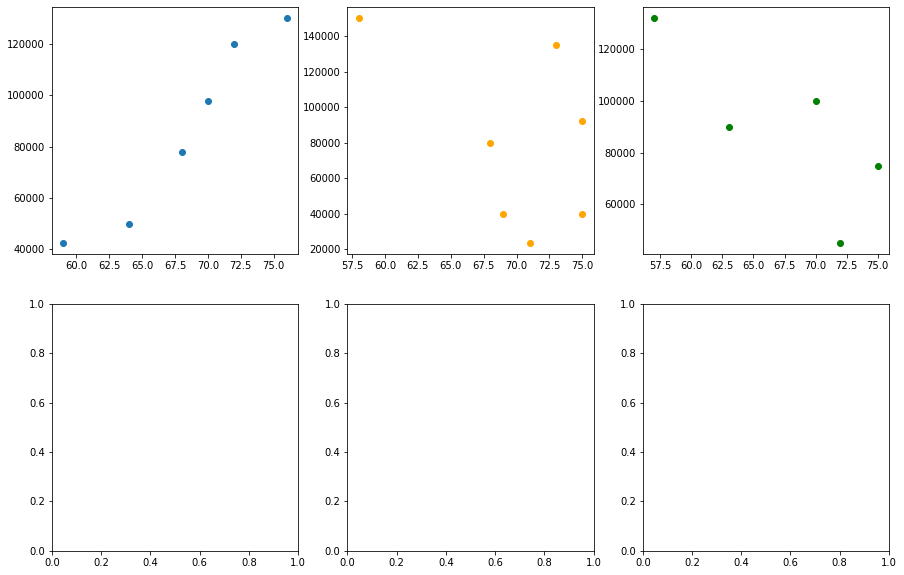

In [25]:
fig

Let's plot some additional categorical data on this plot, then clean it up. 

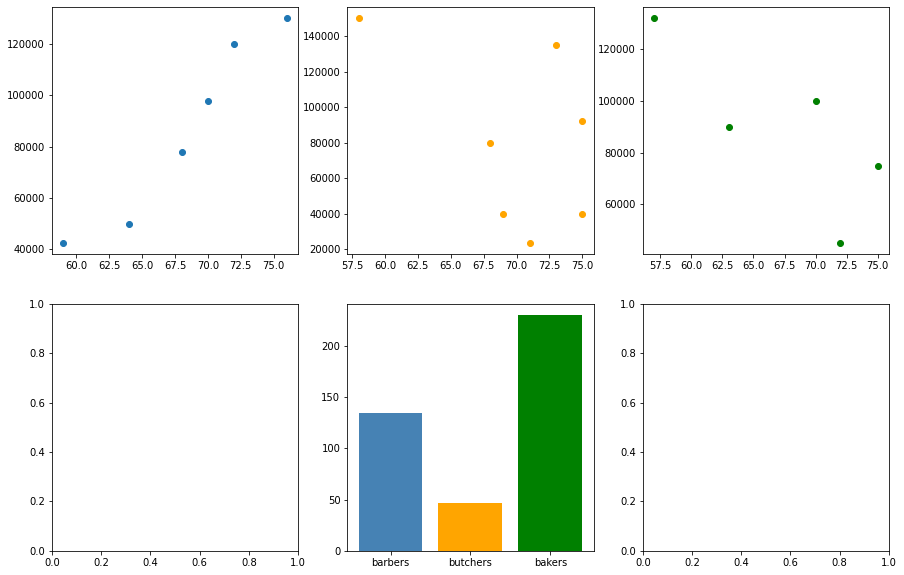

In [27]:
#Some data about the relative frequency of each: 
occupation = ['barbers', 'butchers', 'bakers']
number = [135, 47, 230]

#Exercise! Add a bar plot of the above data on the middle chart of the bottom row
#Bar plot on the middle chart of the bottom row 
axs[1][1].bar(occupation, number, color=["steelblue", "orange", "green"])

fig

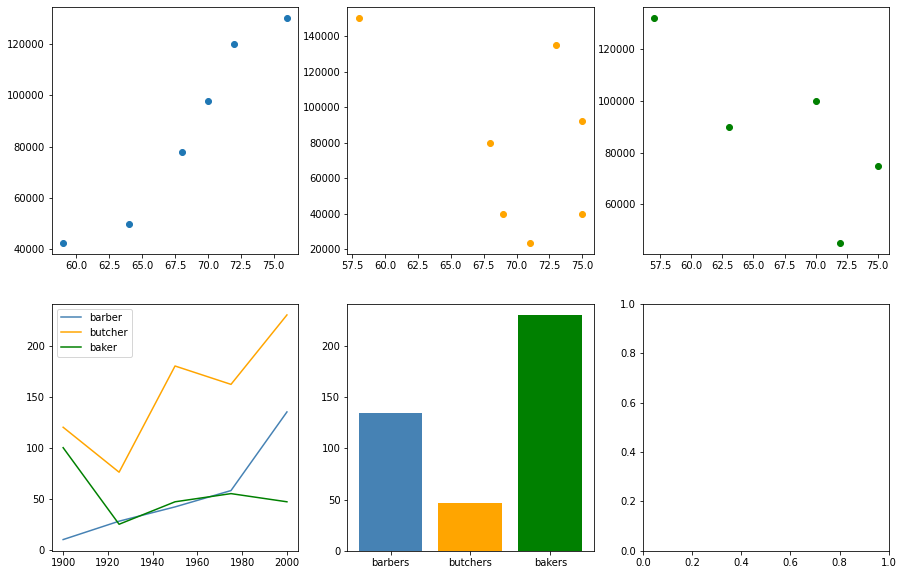

In [28]:
#Add some time series data:
years = [1900, 1925, 1950, 1975, 2000]
barber_n = [10, 28, 42, 58, 135]
baker_n = [100, 25, 47, 55, 47]
butcher_n = [120, 76, 180, 162, 230]

#Exercise! Add a line plot to the bottom left graph
axs[1][0].plot(years, barber_n, c="steelblue", label="barber")
axs[1][0].plot(years, butcher_n, c="orange", label="butcher")
axs[1][0].plot(years, baker_n, c="green", label="baker")

axs[1][0].legend()

fig



##Cleaning up these plots...

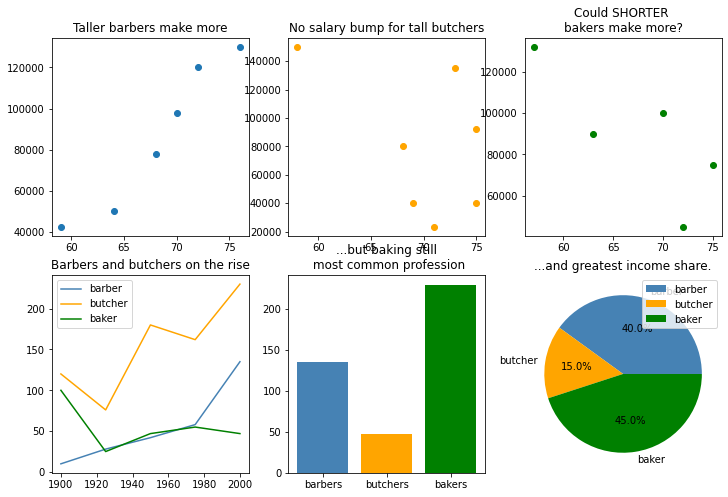

In [ ]:
#Exercise! Title all of the individual plots with headline-worthy titles (I'll show how to do the first one)
##Titling individual plots
axs[0][0].set_title("Taller barbers make more")
axs[0][1].set_title("No salary bump for tall butchers")
axs[0][2].set_title("Could SHORTER \nbakers make more?")

axs[1][0].set_title("Barbers and butchers on the rise")
axs[1][1].set_title("...but baking still\n most common profession")
axs[1][2].set_title("...and greatest income share.")

fig

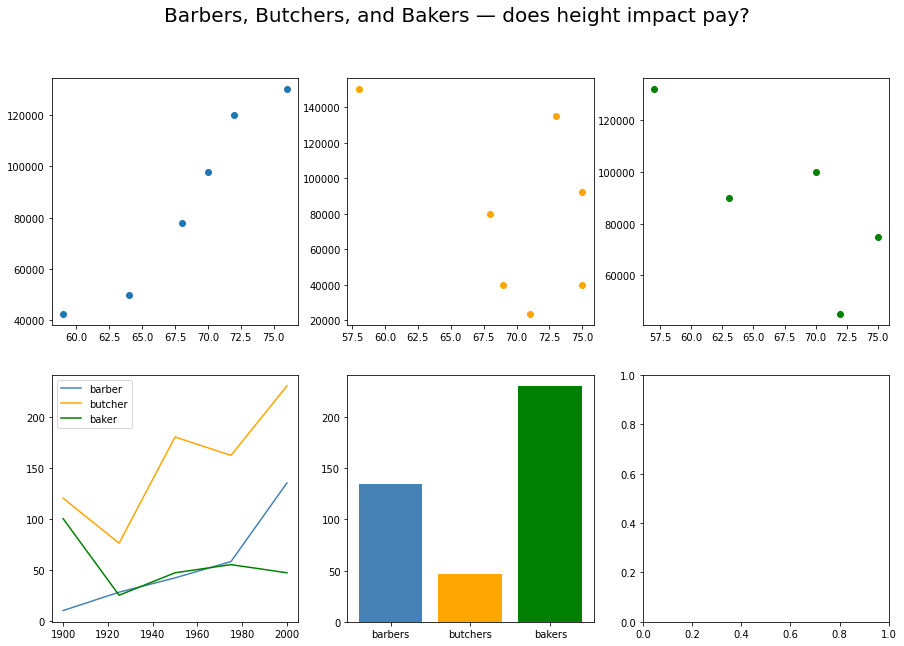

In [29]:
#Add an overall title
#fig here, not axes
fig.suptitle("Barbers, Butchers, and Bakers — does height impact pay?", fontsize=20)

fig